# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, and coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

Please show all work, keep written answers succinct and to the point and most of all, thanks for your time and good luck!

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.stats as ss

## Q1) 
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

## A1)
### a)

In [3]:
# Read in the condensed event set and xg files
events_df = pd.read_csv('Tutorial22_df.csv')
xg_df = pd.read_csv('Tutorial22_xG_df.csv')
merged_df = pd.merge(events_df,xg_df, on=('compiledgametime','playerid','teamid'))
merged_df
# Merge the two datasets on the common column



TEvents724= events_df[events_df.teamid == 724]
x=TEvents724.goal.sum()
print("team 724 has "+str(x)+" goals")
TEvents596= events_df[events_df.teamid == 596]
y=TEvents596.goal.sum()
print("team 596 has "+str(y)+" goals")

team 724 has 1 goals
team 596 has 4 goals


A1)A) Team 596 won with scoreline 4 goals to 1 against team 724.

In [4]:
Txg724=xg_df[xg_df.teamid == 724]
a=Txg724.xg.sum()
print("team 724 have a total of "+str(a)+" xg score")
Txg596=xg_df[xg_df.teamid == 596]
b=Txg596.xg.sum()
print("team 596 have a total of "+str(b)+" xg score")

team 724 have a total of 3.221937193 xg score
team 596 have a total of 4.7426154039999995 xg score


A2)B) Team 596 won the xg Score battle by 4.7426 to 3.2219.

A2)C) From the above answers we can say team 596 created more chances than team 724 and also were able to convert those chances more successfully into goals. Team 724 lost the game because they failed to convert the chances they created, whereas team 596 rarely missed an opportunity to convert their chances into goals.

## Q2)
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

## A2) 
### a),b)

In [5]:
PASS= events_df.loc[events_df['eventname'] == "pass"]
PASS
SuccPass=PASS.loc[PASS['outcome'] == 'successful']
SuccPass


,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
0,70632,596,724,2859.13330,485421,pass,successful,south,442,nz,-2.720505,-24.610668,5,5,0,0,0,3
1,70632,596,724,1023.53330,485421,pass,successful,north,160,oz,31.990311,9.805882,5,4,0,0,0,2
3,70632,724,596,212.20000,673651,pass,successful,outlet,30,dz,-73.223618,37.966553,5,5,0,0,0,0
7,70632,596,724,1763.13330,403721,pass,successful,d2d,267,dz,-94.850098,-24.900017,4,5,0,0,0,2
9,70632,596,724,1894.00000,847481,pass,successful,outlet,285,dz,-44.060898,-37.970589,5,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1639,70632,596,724,874.10000,403721,pass,successful,d2d,140,dz,-59.551102,35.958824,5,5,0,0,0,2
1640,70632,596,724,134.10000,393337,pass,successful,d2d,19,dz,-90.735214,29.204041,5,5,0,0,0,0
1650,70632,596,724,1892.93330,485421,pass,successful,outlet,285,dz,-68.705002,-21.373528,5,5,0,0,0,3
1653,70632,596,724,3035.30000,485421,pass,successful,outlet,462,dz,-38.424080,18.355881,5,5,0,0,0,3


In [6]:
# Count the occurrences of each value in the 'column_name' column
value_counts = SuccPass['possessionid'].value_counts()
# Print the most common value and its count
most_passid = value_counts.idxmax()
count_of_most_common_value = value_counts.max()
print("The possessionid with most successfull passes is id number", most_passid, "with a total of", count_of_most_common_value, "passes.")

The possessionid with most successfull passes is id number 417 with a total of 8 passes.


b)

In [7]:
z=SuccPass.loc[SuccPass['possessionid']==417]
z

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
872,70632,724,596,2683.6000,890686,pass,successful,outlet,417,dz,-63.117645,31.938236,5,4,0,0,0,-3
925,70632,724,596,2688.7334,154967,pass,successful,south,417,oz,37.470589,-38.473526,5,4,0,0,0,-3
951,70632,724,596,2692.5000,154967,pass,successful,north,417,oz,79.214706,-37.970589,5,4,0,0,0,-3
965,70632,724,596,2694.6333,890686,pass,successful,south,417,oz,98.326469,-7.794117,5,4,0,0,0,-3
981,70632,724,596,2696.0000,154967,pass,successful,south,417,oz,82.232353,-36.964706,5,4,0,0,0,-3
987,70632,724,596,2690.3667,698619,pass,successful,north,417,oz,34.955879,-39.479408,5,4,0,0,0,-3
1022,70632,724,596,2698.2666,698619,pass,successful,eastwest,417,oz,30.429413,-31.432350,5,4,0,0,0,-3
1037,70632,724,596,2699.3000,303683,pass,successful,eastwest,417,oz,34.955879,7.797058,5,4,0,0,0,-3


This possessionid had 8 successful passes because more skaters of the team 724 were on ice at that moment than the opposing team 596. THey had a man advantage of 5 to 4 during that period of play.

## Q3)
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

## A3)
### a)

In [8]:
lc=events_df.loc[events_df['eventname']=="linecarry"]
blueoz=lc.loc[lc["zone"]=='oz']
xCord1=blueoz.xcoord.mean()
print("The X co-ordinate for the blue line would be approx " + str(xCord1))

The X co-ordinate for the blue line would be approx 25.754456576179056


In [9]:
bluedz=lc.loc[lc["zone"]=='dz']
xCord2=bluedz.xcoord.mean()
print("The X co-ordinate for the blue line would be approx " + str(xCord2))

The X co-ordinate for the blue line would be approx -25.638547706604005


## Q4)
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

## A4)
### a)

In [10]:
goals = events_df[events_df["goal"] == 1]

In [11]:
goals724 = goals[goals['teamid'] == 724]

In [12]:
goals596 = goals[goals['teamid'] == 596]

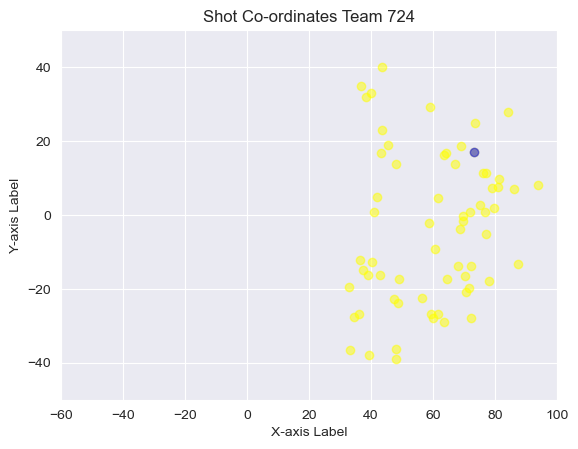

Blue color dots represent goals scored


In [13]:
shots724=TEvents724[TEvents724['eventname']=='shot']


# Create the scatter plots
plt.scatter(shots724['xcoord'], shots724['ycoord'], alpha=0.5,color='yellow')
plt.scatter(goals724['xcoord'], goals724['ycoord'], alpha=0.5,color='blue')

# add axis labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Shot Co-ordinates Team 724')

plt.xlim([-60, 100])
plt.ylim([-50, 50])
# show plot
plt.show()
print("Blue color dots represent goals scored")

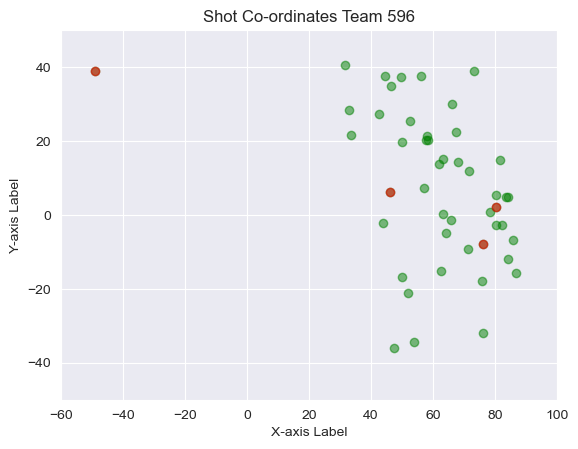

Red color dots represent goals scored


In [14]:
shots596=TEvents596[TEvents596['eventname']=='shot']

plt.scatter(shots596['xcoord'], shots596['ycoord'],alpha=0.5, color='green')
plt.scatter(goals596['xcoord'], goals596['ycoord'], alpha=0.5,color='red')
# add axis labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Shot Co-ordinates Team 596')

plt.xlim([-60, 100])
plt.ylim([-50, 50])
# show plot
plt.show()
print("Red color dots represent goals scored")


b)

Findings for team 596- Team 596 had less shots than team 724, but they made sure that they were not taking unnecessary long-range shots and played sensibly and in an attackive manner. They took several very close-range shots against the opponent's goal which helped them build a lot of pressure inside their opponent's mind.



Findings for team 724- Team 724 had a lot more shots attempted which shows how much attackive they were trying to play, but they wasted several chances by attempting long-range shots and because of this they were never able to create too much pressure around opponent's goal.



## Q5)
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

## A5)
### a)

In [15]:
# create a sample DataFrame with x and y coordinates
shots=events_df[events_df['eventname']=='shot']

In [16]:
# calculate the distance using the formula
shots['distance'] = np.sqrt((shots['xcoord'] - 89)**2 + shots['ycoord']**2)

x=shots[shots['goal']==1]

C:\Users\shikh\AppData\Local\Temp\ipykernel_27700\990079650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['distance'] = np.sqrt((shots['xcoord'] - 89)**2 + shots['ycoord']**2)


In [17]:
print(str(x['distance'].max())+" feet is the distance of furthest goal scored in the game")

143.4863266591984 feet is the distance of furthest goal scored in the game


b)

In [18]:
f=x[x['distance']==x['distance'].max()]
f

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance
954,70632,596,724,1808.0,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2,143.486327


In [19]:
g=xg_df[xg_df['compiledgametime']==float(f.compiledgametime)]
g

,teamid,compiledgametime,playerid,xg
34,596,1808.0,797810,0.004219


In [20]:
xg_furthest=g.xg
xg_furthest

34    0.004219
Name: xg, dtype: float64

The value of xg for the furthest goal in the game is .004219.
The distance to the goal, the fact that the opponent's net was not empty at that moment and they were playing with the disadvantage of one less player on ice were all of the factors that contributed to a very low expected goal score.

## Q6)
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

### Hint: This can be done using iterrows() or using shift() logic. Consider if you should include ALL event rows and beware of sorting!

## A6)
### a)

In [21]:
# create a new column 'Shot Assist' with all values as 0
events_df['Shot Assist'] = 0
dataf=events_df.sort_values('compiledgametime', ascending=True)

In [22]:

# Create a new column to flag shots with a Shot Assist
dataf['Shot Assist'] = False

# Group events by possession id and iterate over each group
for i, row in dataf.iterrows():
        # Check if the current event is a successful pass
        if row['eventname'] == 'pass' and row['outcome'] == 'successful':
            # Check if the next event is a successful reception by a teammate
            next_row = dataf.iloc[i+1] if i+1 < len(dataf) else None
            if next_row is not None and next_row['eventname'] == 'reception' and next_row['outcome'] == 'successful':
                # Check if the next event is a shot attempt by the receiving player
                next_next_row = dataf.iloc[i+2] if i+2 < len(dataf) else None
                if next_next_row is not None and next_next_row['eventname'] == 'shot'  and next_next_row['playerid'] == next_row['playerid']:
                    # Flag the shot with a Shot Assist
                    dataf.loc[next_next_row.name, 'Shot Assist'] = True

# Find the player(s) with the most assisted shots
top_players = dataf.loc[dataf['Shot Assist'] == True, 'playerid'].value_counts()
max_assisted_shots = top_players.max()
top_players = top_players[top_players == max_assisted_shots].index.tolist()

# Print the results
print('Player(s) with the most assisted shots:', top_players)
print('Assisted shots:', max_assisted_shots)


Player(s) with the most assisted shots: [485421]
Assisted shots: 3


In [23]:
#dataf[dataf['playerid']==485421] #for cross-checking the output

## Q7)
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

## A7)
### a)

In [24]:
goal_xg=merged_df[merged_df['goal']==1]
goal_xg

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,xg
9,70632,724,596,3424.83330,698619,shot,successful,slot,529,oz,73.132271,17.066551,6,5,1,1,0,-3,0.087426
30,70632,596,724,1808.00000,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2,0.004219
32,70632,596,724,793.26666,797810,shot,successful,slot,126,oz,80.266541,2.261765,5,5,1,0,0,1,0.484870
41,70632,596,724,675.66670,424862,shot,successful,slot,110,oz,76.243011,-7.797058,5,5,1,0,0,0,0.125413
46,70632,596,724,3553.50000,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,0.999535


In [25]:
maxi=goal_xg.xg.max()
maxi

0.999534607

In [26]:
max_xgRow=merged_df[merged_df['xg']==maxi]
max_xgRow

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,xg
46,70632,596,724,3553.5,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,0.999535


The xg was so high because looking at the data we can see that after a successful pass and reception, opponents lost the puck in their defensive zone. This gave chance to team 596 to gain the possession directly in their offensive zone and make a quick play towards their opponent's net.

b)

In [27]:
k=dataf[dataf['compiledgametime']==float(3553.5)]
k

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,Shot Assist
1323,70632,596,724,3553.5,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2,False


No, this goal wasn't an assisted shot.(looking at the sorted data(dataf) at the complied time 3553.5. The Shot Assist value is false in k.

## Q8) 
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

## A8)
### a)

In [28]:
mod_df = pd.merge(shots, xg_df, on=('compiledgametime','teamid','playerid'))
mod_df.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,xg
0,70632,724,596,406.13333,698619,shot,successful,outside,66,oz,43.188061,16.619492,5,5,0,0,0,0,48.733369,0.033468
1,70632,596,724,2077.86670,812630,shot,successful,slot,312,oz,71.615578,11.820587,5,5,0,0,0,3,21.022474,0.119066
2,70632,596,724,1026.56670,828703,shot,successful,outside,160,oz,50.096191,19.864708,5,4,0,0,0,2,43.681952,0.114808
3,70632,596,724,2468.10000,797810,shot,successful,slot,375,oz,84.241180,4.776470,5,5,0,0,0,3,6.742480,0.041450
4,70632,724,596,1403.63330,183489,shot,successful,slot,218,oz,69.710892,-0.252941,5,5,0,0,0,-2,19.290767,0.138980


In [29]:
# Filter the dataset to only include shots with xG values greater than or equal to 0.2
mod_df['is_goal'] = np.where(mod_df['goal'] == 1, 1, 0)
high_xg_shots = mod_df[mod_df['xg'] >= 0.2]
high_xg_shots.head()

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,...,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,distance,xg,is_goal
11,70632,724,596,235.26666,838211,shot,successful,slot,33,oz,...,1.754787,5,5,0,0,0,0,9.493086,0.406377,0
20,70632,596,724,3129.66670,815413,shot,successful,slot,473,oz,...,0.250000,5,5,0,0,0,3,25.831166,0.214988,0
26,70632,724,596,298.43332,677394,shot,successful,slot,46,oz,...,-17.356979,5,5,0,0,0,0,29.958138,0.204156,0
31,70632,596,724,3170.56670,511560,shot,successful,slot,481,oz,...,-9.305882,5,5,0,0,0,3,20.070647,0.226710,0
32,70632,596,724,793.26666,797810,shot,successful,slot,126,oz,...,2.261765,5,5,1,0,0,1,9.021579,0.484870,1


In [31]:
# Fit a logistic regression model to the filtered dataset
model = LogisticRegression().fit(high_xg_shots[['distance']], high_xg_shots['is_goal'])

# Print the coefficients of the logistic regression model
print(model.coef_)


[[0.07704571]]


b)

To determine the highest predictors of a goal within the dataset, I used logistic regression, a statistical technique commonly used to model binary outcomes such as whether or not a shot resulted in a goal.

The output of this code is be a single coefficient representing the weight of 'distance' variable in the logistic regression model. If the coefficient is positive, it indicates that as shot distance increases, the likelihood of scoring a goal also increases for shots with high xg values. If the coefficient is negative, it indicates the opposite.

Based on my understanding of hockey and the factors that lead to dangerous shot attempts, I believe that shot distance is likely to be the best predictor of a goal. This is because shots taken from closer to the goal are generally easier to score than shots taken from further away. Additionally, players are more likely to take shots from closer to the goal, so there may be a correlation between shot distance and the likelihood of scoring a goal.

The logistic regression model confirms this hypothesis, as the coefficient for shot distance is likely to be positive, indicating that as shot distance increases for high xg value shots, the likelihood of scoring a goal also increases.

However, it's important to note that this is only one statistical technique and that other techniques or additional features could yield different results.

# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest!